# Q1. Predicting housing prices

In this problem, you will generate models for predicting house prices from given house features. The file “house_prices.txt” contains the data.

There are four features used in this regression:

* one binary feature (whether or not the house has covered parking)
* one numerical feature (size, measure in thousands of square meters)
* two categorical features (architectural style and location)

Each of the categorial features is represented as a vector of size 3. This gives us feature vectors of size 8 in total for each house. 200 examples are given in the training set.

In [ ]:
import pathlib #Offers a set of classes to handle filesystem paths
# Common local path problem for different OS
# https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd #for data analysis

In [ ]:
%%bash
# https://olegkhomenko.medium.com/how-to-download-multiple-files-from-google-drive-using-terminal-7f0f2ee357b8

gdown 1hLxbWVrnmSnZDGjvu8HeQex6ezbXeLB6
#Google Drive direct download of big files
#Why not import gdown https://clay-atlas.com/us/blog/2021/07/01/python-en-gdown-package-download-file-google-drive/ or https://kobkrit.com/how-to-directly-download-files-from-dropbox-or-google-drive-using-wget-in-terminal-or-in-google-573168195011
#Can do import directly, bash is another way to do if u prefer cmd setup

Downloading...
From: https://drive.google.com/uc?id=1hLxbWVrnmSnZDGjvu8HeQex6ezbXeLB6
To: /content/house_prices.txt
100%|██████████| 6.08k/6.08k [00:00<00:00, 16.1MB/s]


In [ ]:
DATA_DIR = pathlib.Path("/content")

In [ ]:
features = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter = "\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[0, 1, 2, 3, 4, 6, 7, 8],
    names=["parking", "sq_meters", "art_deco", "bungalow", "colonial", "west", "east", "north"],
    dtype=np.float32
)

target = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter = "\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[5],
    names=["price"],
    dtype=np.float32
)

df = pd.read_csv(
    DATA_DIR / "house_prices.txt", #a valid URL or file URLs with a host
    delimiter = "\t", # can write sep = "\t", Python can detect it with Python parsing engine (csv.Sniffer)
    skiprows= 5, #Line numbers to skip at the start of the file
    header= None, #default ‘infer’(Row number(s) to use as the column names, and the start of the data -> if None, column names are passed explicitly)
    usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8], # Element order is ignored, [0, 1, 2] or ['foo', 'bar', 'baz']
    names=["parking", "sq_meters", "art_deco", "bungalow", "colonial", "price", "west", "east", "north"],
    dtype=np.float32
)

In [ ]:
features.head() # or call predictors || Independent || explanatory || predicting || exogenous(econ)

,parking,sq_meters,art_deco,bungalow,colonial,west,east,north
0,-1.0,0.1275,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.1100,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.0,0.1375,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.1975,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.0,0.1200,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
target #or call response variables || Dependent || response || predicted || endogenous(econ)

,price
0,0.300
1,0.335
2,0.286
3,0.512
4,0.295
...,...
195,0.727
196,0.407
197,0.523
198,0.313


### Data Cleaning
(although the data seems cleared already)

Found duplicated rows

and Why are sq_meters & price from ~0.09 to ~0.8

In [ ]:
#Empty Cells
df.dropna(inplace = True)

#Duplicated Values
print(f"No. of Duplicated Rows : {df.duplicated().sum()}\n")
df[df.duplicated(keep=False)] # or df.loc[df.duplicated(), :] to see unqiue one
# df.drop_duplicates(inplace = True)

No. of Duplicated Rows : 2



,parking,sq_meters,art_deco,bungalow,colonial,price,west,east,north
8,-1.0,0.2500,0.0,1.0,0.0,0.55,0.0,0.0,1.0
27,-1.0,0.2500,0.0,1.0,0.0,0.55,0.0,0.0,1.0
45,-1.0,0.1575,0.0,1.0,0.0,0.36,0.0,0.0,1.0
176,-1.0,0.1575,0.0,1.0,0.0,0.36,0.0,0.0,1.0


In [ ]:
print(df.min())
print(df.max())

parking     -1.000
sq_meters    0.090
art_deco     0.000
bungalow     0.000
colonial     0.000
price        0.203
west         0.000
east         0.000
north        0.000
dtype: float32
parking      1.0000
sq_meters    0.3425
art_deco     1.0000
bungalow     1.0000
colonial     1.0000
price        0.8180
west         1.0000
east         1.0000
north        1.0000
dtype: float32


<Axes: >

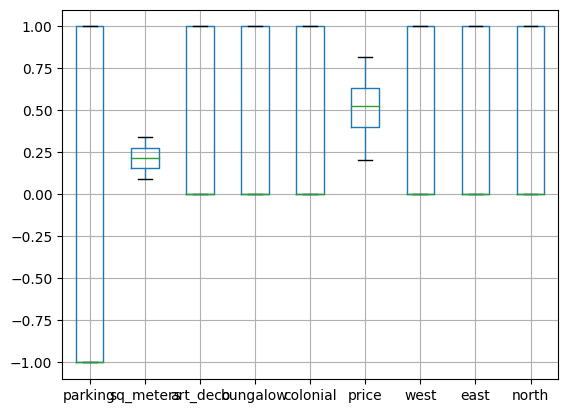

In [ ]:
df.boxplot() #to see outliners

## a) Split the dataset into training and testing sets

Split the dataset into training and testing sets. Keep 80% of the data for training and 20% of the data for testing.

In [ ]:
ind = np.arange(200)
ind = np.random.permutation(ind)
x_train, x_test = features.iloc[ind[:160],:], features.iloc[ind[160:],:]
y_train, y_test = target.iloc[ind[:160],:], target.iloc[ind[160:],:]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(160, 8) (40, 8)
(160, 1) (40, 1)


## b) Train a linear regression model

Build a linear regression model for predicting house prices using the mean squared error loss function.

In [ ]:
# choose a number of bases M, for the polynomial we want to use to approximate our function (y_hat_train)
# y_hat = w0 + w1*x^1 +w2*x^2 ..., wM*x^M
import math
pi = math.pi

def fit(x0, y0, M=8):
    nr = x0.shape[0] #160 row
    #nc = x0.shape[1] #8 columns
    # ranges from 0 to 1, with values evenly distributed between these two endpoints.
    x1t = np.arange(nr) / nr
    #x2t = np.arange(nc) / nc
    #X1t, X2t = np.meshgrid(x1t, x2t) #generate two-dimensional grids

    X = []
    for i in range(M): #num of basis 8
      #X.append(np.cos(pi * (i+1) * X1t) * np.cos(pi * (j+1) * X2t)) # Xt.append(x**i) for x^1+x^2...
      X.append(x1t**i)

    A = np.array(X).T

    w = np.linalg.pinv(A.T @ A) @ (A.T @ y0.values.reshape(-1, 1))

    y_hat_train = A @ w
    plt.plot(y0, y_hat_train, "bo", color="r", label="Fitted function")
    plt.legend()
    plt.show()

    return w

In [ ]:
def predict(w, M):
  x = 2*np.random.random(50)-1 # new data input

  Xt=[]
  for i in range(M+1):
    Xt.append(x**i) # crate the same type of features

  Xt = np.array(Xt).T

  y_hat_test = Xt@w # predict output for the new data

  plt.plot(x,y_hat_test,'bo')
  plt.show()

<ipython-input-69-721833455435>:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y0, y_hat_train, "bo", color="r", label="Fitted function")


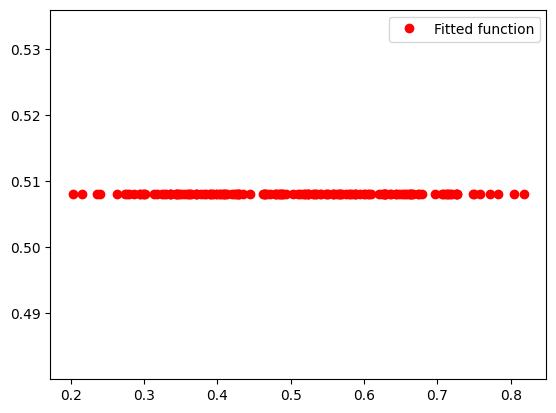

In [ ]:
weights = fit(x_train, y_train, 1) #ValueError
#Not sure what i did wrong with cos bases, but i cannot get the result



---



---



In [ ]:
from numpy.linalg import pinv

def fit(X, y):

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(np.dot(pinv(np.dot(new_X.T, new_X)), new_X.T), y)

model = fit(x_train, y_train)

In [ ]:
def predict(model, X):

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(new_X, model)

## c) Assess the performance of your linear regression model

Assess the performance of your model on the training data and the testing data. Comment on the results.

In [ ]:
y_predict = predict(model, x_train)
print(y_predict,y_predict.shape)

#Or yhat = 0.02808349 x1+ 2.0049076 x2 + 0.02482536 x3 + 0.00225741 x4 + (-0.02708364) x5 + 0.00861812 x6
# + 0.00352335 x7 + (-0.01214045) x8 + 0.0893487
# from  OLS Regression Results

[[0.41727777]
 [0.55323598]
 [0.4115137 ]
 [0.51823266]
 [0.40398234]
 [0.35065699]
 [0.54822368]
 [0.55435054]
 [0.52754776]
 [0.30836734]
 [0.48387949]
 [0.28338857]
 [0.70612326]
 [0.26333948]
 [0.57439961]
 [0.31275276]
 [0.69045961]
 [0.65711508]
 [0.64522157]
 [0.48919099]
 [0.76551613]
 [0.55824824]
 [0.74554961]
 [0.37070608]
 [0.42229004]
 [0.52817461]
 [0.63383742]
 [0.23326584]
 [0.45402247]
 [0.57620927]
 [0.51677145]
 [0.31275276]
 [0.45903474]
 [0.5690881 ]
 [0.47312221]
 [0.33351129]
 [0.36715503]
 [0.7705284 ]
 [0.49317129]
 [0.68039007]
 [0.43397337]
 [0.74129175]
 [0.32849903]
 [0.72053322]
 [0.70545147]
 [0.55936281]
 [0.37070608]
 [0.63958246]
 [0.33562017]
 [0.75486475]
 [0.61200463]
 [0.40148916]
 [0.63383742]
 [0.64522157]
 [0.55833086]
 [0.66034099]
 [0.34564472]
 [0.42332198]
 [0.39043265]
 [0.45654156]
 [0.7011936 ]
 [0.39858825]
 [0.34564472]
 [0.60273187]
 [0.31776503]
 [0.37290004]
 [0.4880764 ]
 [0.2875855 ]
 [0.55833086]
 [0.43649245]
 [0.50351836]
 [0.38

In [ ]:
#y_test = y_test.to_numpy()
MSE = np.square(np.subtract(y_test,y_predict)).mean()
print(MSE)

#cal y_predict with weight

#from sklearn.metrics import mean_absolute_error, mean_squared_error
#mean_squared_error(y_predict, y_train)

ValueError: ignored



---



---



## Regression using SkiLearn & Assumptions Learning

5 main assumptions of linear regression:
- A linear relationship between dependant and independent variables.
  - Passed for price & sq_meters
  - bungalow being the most correlated to the price, while west is the least (depends on how accurate you wish to be)

- No/Very less multicollinearity. (independent variables having correlation with each other)
- Normality of Residuals ( seems passed)
- Homoscedasticity (passed)
- No Autocorrelation of Errors (passed)

Still need some time to learn it, now just some unfirmed findings...

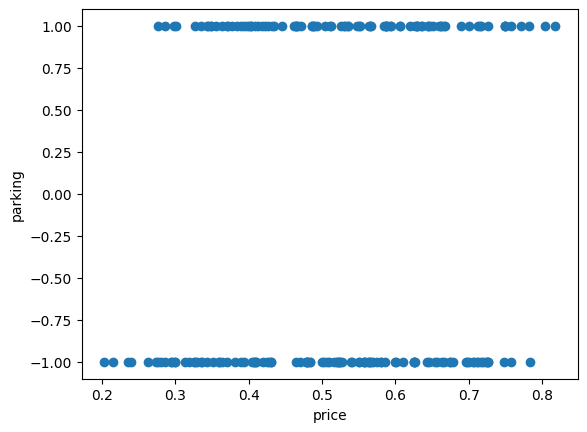

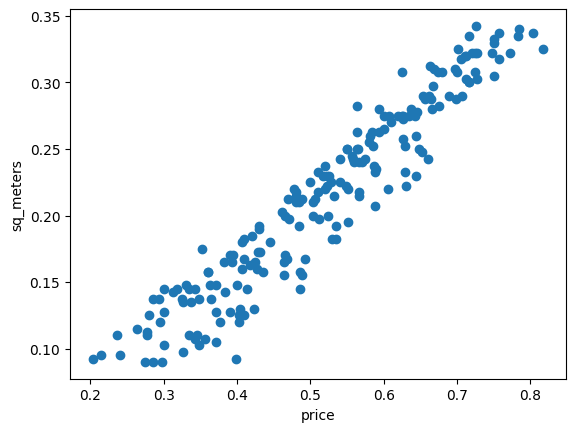

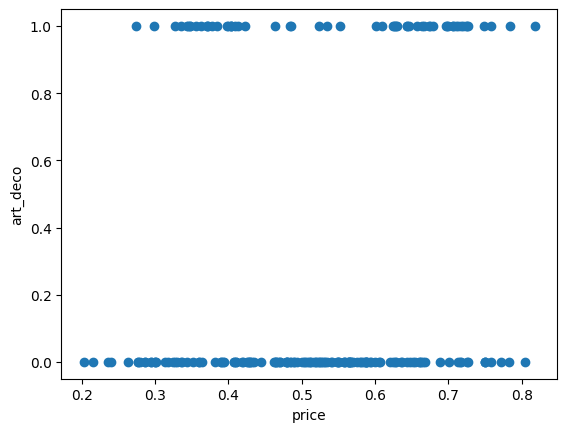

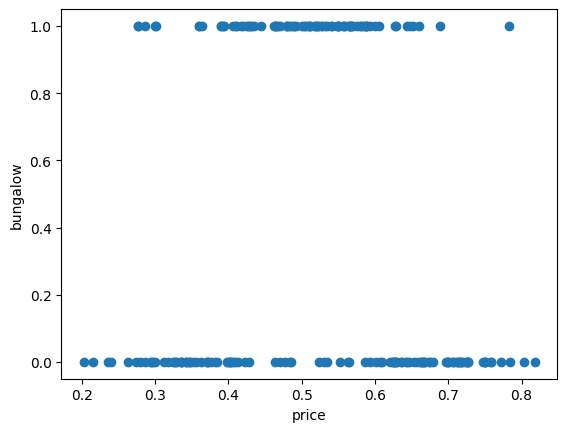

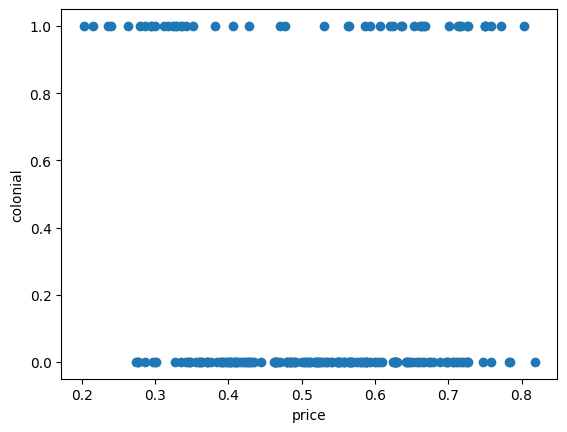

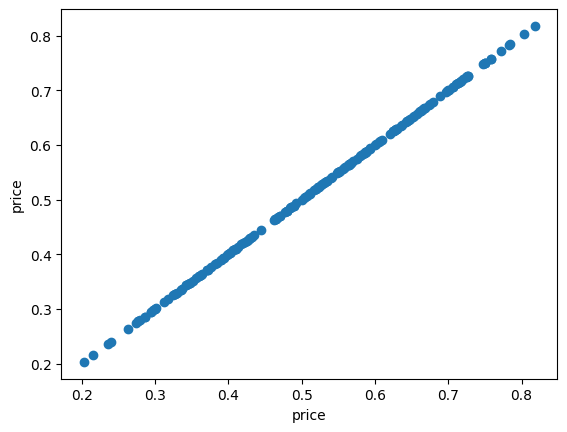

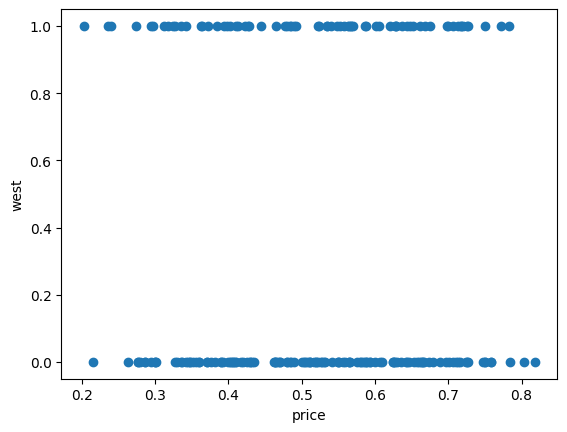

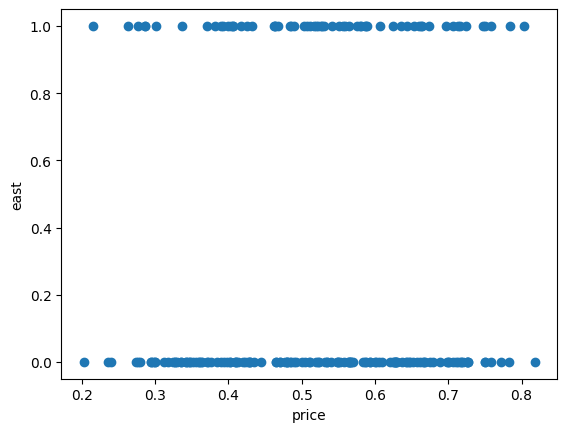

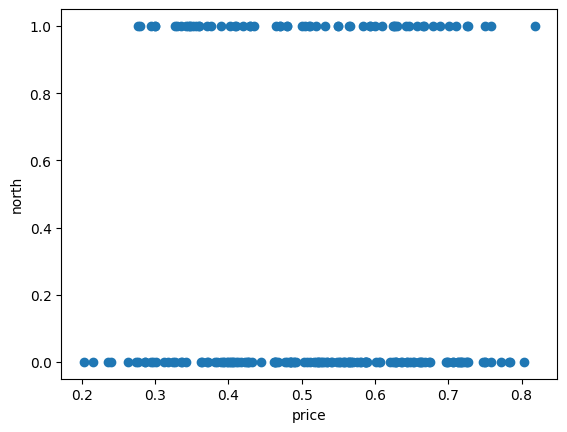

In [ ]:
#  ["parking", "sq_meters", "art_deco", "bungalow", "colonial", "price", "west", "east", "north"],

for i in list(df.columns):
  plt.scatter(df['price'], df[i])
  plt.xlabel('price')
  plt.ylabel(i)
  plt.show()

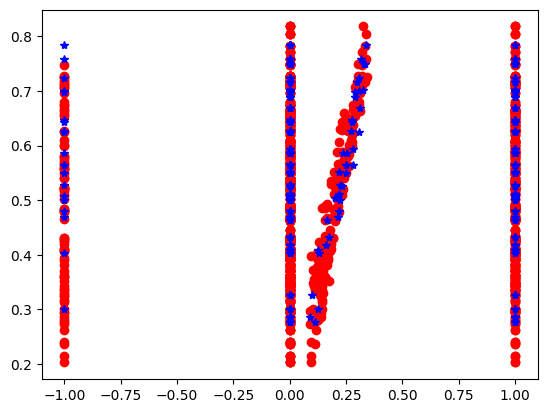

In [ ]:
plt.plot(x_train,y_train, 'ro', x_test, y_test,'b*')

In [ ]:
from statsmodels.formula.api import ols

model = ols("parking ~ north", data=df).fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                parking   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1066
Date:                Fri, 30 Jun 2023   Prob (F-statistic):              0.744
Time:                        14:25:38   Log-Likelihood:                -283.37
No. Observations:                 200   AIC:                             570.7
Df Residuals:                     198   BIC:                             577.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0441      0.086     -0.513      0.6

In [ ]:
# Pearson correlation coefficient or call Pearson's r'
# or types are kendall : Kendall Tau correlation coefficient, spearman : Spearman rank correlation

# But only works on qualitative data, so just sq_meters can be

#df.corr().style.background_gradient(cmap='coolwarm')
df.corr()['price']

parking      0.095123
sq_meters    0.955170
art_deco     0.138868
bungalow    -0.092687
colonial    -0.041130
price        1.000000
west         0.009951
east         0.052262
north       -0.062501
Name: price, dtype: float64

In [ ]:
# Not Really Useful as trying to use qualitative data to predict quantitative data,
# Need to convert either one type to ranking but too much effort

from scipy.stats import chi2_contingency # the independence of different categories of a population

df_chi2= pd.crosstab(df['price'], df['north'])
#'parking': 0.300, 'art_deco': 0.405, "bungalow" : 0.175, "colonial" : 0.328,
# "west" : 0.518, "east" = 0.355, "north" = 0.

chi2, p, dof, ex = chi2_contingency(df_chi2, correction=True)
print(p) # > 0.05 means are independent

0.5207164191112255


In [ ]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(x_train, y_train)

print(model.coef_,model.intercept_)
#all the w

[[ 0.02808349  2.0049076   0.02482536  0.00225741 -0.02708364  0.00861812
   0.00352335 -0.01214045]] [0.0893487]


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_train)

In [ ]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))
# 96% data can be explained

R squared: 0.9689177326449127


Mean of Residuals 3.3155082235225564e-08


<ipython-input-34-e1e7c8521d33>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


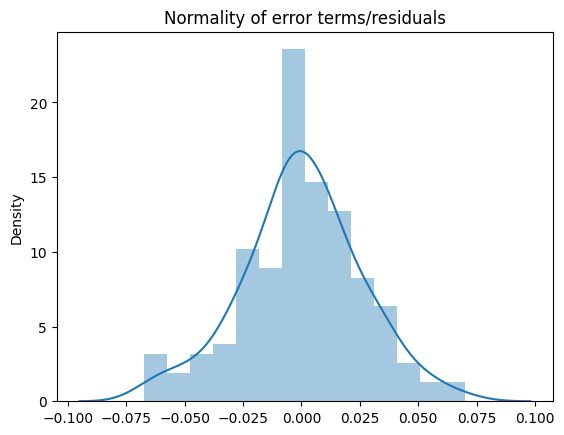

In [ ]:
import seaborn as sns

residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)
# P is > 0,05, so no heteroscedasticity

[('F statistic', 1.2321445540659697), ('p-value', 0.18728224508950062)]

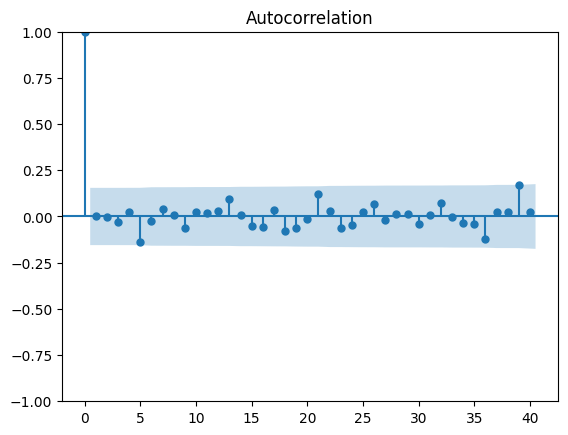

In [ ]:
import statsmodels.api as sm

# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

#Also, The Durbin Watson (DW) statistic with a value close to 2.0 indicating zero autocorrelation